## Files:
- 2023_tbl_approvedschools.csv
    - School info year 2023
    - Name: approvedschools_2023

- 2024_tbl_approvedschools.csv
    - School info year 2024
    - Name: approvedschools_2024

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

approvedschools_2023 = pd.read_csv("data/2023_tbl_approvedschools.csv")
approvedschools_2024 = pd.read_csv("data/2024_tbl_approvedschools.csv")

approvedschools_2023["SCH_COMPCCERT_CSCI"] = approvedschools_2023["SCH_COMPCCERT_CSCI"].replace(-9, np.nan)

alt_keywords = [
    'Academy', 'STEM', 'Charter', 'State Schools', 'Virtual', 'Institute', 
    'Foundry', 'Transition', 'Center', 'Online', 'Intervention', 'S.T.E.M.', 
    'Treatment', 'Youth', 'Home', 'Ministries', 'Chance', 'Comprehensive', 
    'Career', 'Arts', 'E-Learning', 'Humanities', 'ITU'
]
pattern = '|'.join([f".*{word}.*" for word in alt_keywords])
filtered_2023 = approvedschools_2023[
    ~approvedschools_2023["School_Name"].str.contains(pattern, case=False, na=False)
].copy()

filtered_2023 = filtered_2023.rename(columns={
    "UNIQUE_SCHOOL_ID": "UNIQUESCHOOLID",
    "School_Name": "SCHOOL_NAME",
    "Grade_Range": "GRADE_RANGE",
    "Total_Student_Count": "Total Student Count",
    "Free_Lunch": "Free Lunch*",
    "Reduced_Lunch": "Reduced Lunch*",
    "Locale_Type": "Locale",
    "Teacher_Number": "CS_Teachers"
})

filtered_2023["CS_Teachers"] = filtered_2023["CS_Teachers"].fillna(0)
approvedschools_2024 = approvedschools_2024.rename(columns={"Total CS Teachers": "CS_Teachers"})

cs_enr_cols_2023 = [
    "SCH_COMPENR_CSCI_HI_M", "SCH_COMPENR_CSCI_HI_F", 
    "SCH_COMPENR_CSCI_WH_M", "SCH_COMPENR_CSCI_WH_F",
    "SCH_COMPENR_CSCI_BL_M", "SCH_COMPENR_CSCI_BL_F",
    "SCH_COMPENR_CSCI_AS_M", "SCH_COMPENR_CSCI_AS_F"
]
filtered_2023["CS_Enrollment"] = filtered_2023[cs_enr_cols_2023].sum(axis=1)
approvedschools_2024["CS_Enrollment"] = approvedschools_2024["COURSE_TAKER_CS"].fillna(0)

valid_2023 = filtered_2023[
    (filtered_2023["CS_Teachers"] > 0) &
    (filtered_2023["Total Student Count"] > 0)
].copy()

valid_2024 = approvedschools_2024[
    (approvedschools_2024["CS_Teachers"] > 0) &
    (approvedschools_2024["Total Student Count"] > 0)
].copy()

summary_2023 = valid_2023.groupby("Locale").agg({
    "Total Student Count": "mean",
    "CS_Teachers": "mean"
}).reset_index()
summary_2023["Student_CS_Teacher_Ratio"] = summary_2023["Total Student Count"] / summary_2023["CS_Teachers"]

summary_2024 = valid_2024.groupby("Locale").agg({
    "Total Student Count": "mean",
    "CS_Teachers": "mean"
}).reset_index()
summary_2024["Student_CS_Teacher_Ratio"] = summary_2024["Total Student Count"] / summary_2024["CS_Teachers"]

summary_2023 = summary_2023.rename(columns={
    "Total Student Count": "Avg Total Students",
    "CS_Teachers": "Avg CS Teachers",
    "Student_CS_Teacher_Ratio": "Avg Student/CS Teacher Ratio"
})

summary_2024 = summary_2024.rename(columns={
    "Total Student Count": "Avg Total Students",
    "CS_Teachers": "Avg CS Teachers",
    "Student_CS_Teacher_Ratio": "Avg Student/CS Teacher Ratio"
})

summary_merged = pd.merge(
    summary_2023,
    summary_2024,
    on="Locale",
    suffixes=("_2023", "_2024")
)

change_df = summary_merged[["Locale"]].copy()
change_df["Change in Students"] = summary_merged["Avg Total Students_2024"] - summary_merged["Avg Total Students_2023"]
change_df["Change in Teachers"] = summary_merged["Avg CS Teachers_2024"] - summary_merged["Avg CS Teachers_2023"]
change_df["Change in Student/Teacher Ratio"] = summary_merged["Avg Student/CS Teacher Ratio_2024"] - summary_merged["Avg Student/CS Teacher Ratio_2023"]
summary_2023 = summary_2023.round(2)
summary_2024 = summary_2024.round(2)
change_df = change_df.round(2)

display(Markdown("### CS Teaching by Locale (2023) — *Averages*"))
display(summary_2023)

display(Markdown("### CS Teaching by Locale (2024) — *Averages*"))
display(summary_2024)

display(Markdown("### Change from 2023 to 2024"))
display(change_df)


### CS Teaching by Locale (2023) — *Averages*

,Locale,Avg Total Students,Avg CS Teachers,Avg Student/CS Teacher Ratio
0,City,1314.48,3.41,385.13
1,Rural,1057.92,1.74,607.45
2,Suburb,1909.29,3.92,487.17
3,Town,1074.18,1.39,771.21


### CS Teaching by Locale (2024) — *Averages*

,Locale,Avg Total Students,Avg CS Teachers,Avg Student/CS Teacher Ratio
0,City,1325.61,3.02,438.55
1,Rural,1191.68,1.92,619.68
2,Suburb,1882.02,3.75,502.40
3,Town,1053.43,1.37,768.12


### Change from 2023 to 2024

,Locale,Change in Students,Change in Teachers,Change in Student/Teacher Ratio
0,City,11.14,-0.39,53.42
1,Rural,133.76,0.18,12.22
2,Suburb,-27.28,-0.17,15.23
3,Town,-20.75,-0.02,-3.08


### Correlation between Number of CS Teachers and CS Enrollment Ratio

2023 — r = 0.195, p = 0.0019245427
2024 — r = 0.273, p = 0.0000011378


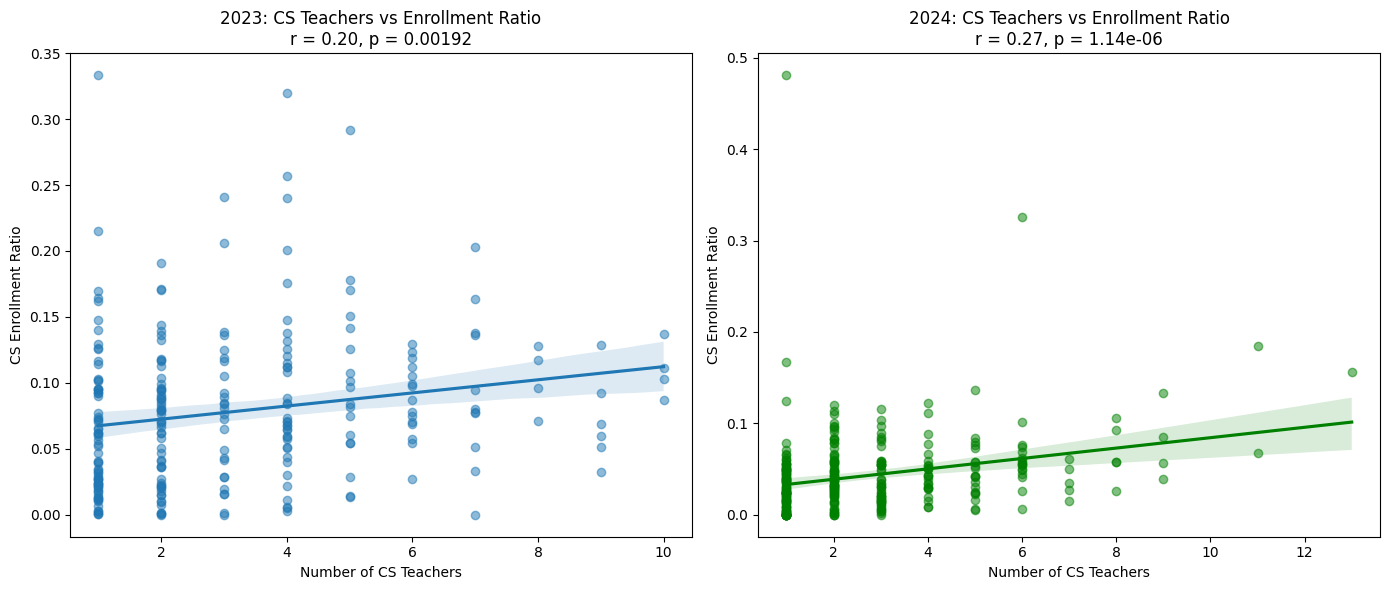

In [2]:
valid_2023["Enrollment_Ratio"] = valid_2023["CS_Enrollment"] / valid_2023["Total Student Count"]
valid_2024["Enrollment_Ratio"] = valid_2024["CS_Enrollment"] / valid_2024["Total Student Count"]

clean_2023 = valid_2023[
    (valid_2023["Enrollment_Ratio"] >= 0) &
    (valid_2023["CS_Teachers"] > 0)
].copy()

clean_2024 = valid_2024[
    (valid_2024["Enrollment_Ratio"] >= 0) &
    (valid_2024["CS_Teachers"] > 0)
].copy()

from scipy.stats import pearsonr

corr_2023 = pearsonr(clean_2023["CS_Teachers"], clean_2023["Enrollment_Ratio"])
corr_2024 = pearsonr(clean_2024["CS_Teachers"], clean_2024["Enrollment_Ratio"])

from IPython.display import display, Markdown
display(Markdown("### Correlation between Number of CS Teachers and CS Enrollment Ratio"))
print(f"2023 — r = {corr_2023[0]:.3f}, p = {corr_2023[1]:.10f}")
print(f"2024 — r = {corr_2024[0]:.3f}, p = {corr_2024[1]:.10f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=clean_2023, x="CS_Teachers", y="Enrollment_Ratio", scatter_kws={"alpha": 0.5})
plt.title(f"2023: CS Teachers vs Enrollment Ratio\nr = {corr_2023[0]:.2f}, p = {corr_2023[1]:.3g}")
plt.xlabel("Number of CS Teachers")
plt.ylabel("CS Enrollment Ratio")

plt.subplot(1, 2, 2)
sns.regplot(data=clean_2024, x="CS_Teachers", y="Enrollment_Ratio", scatter_kws={"alpha": 0.5}, color="green")
plt.title(f"2024: CS Teachers vs Enrollment Ratio\nr = {corr_2024[0]:.2f}, p = {corr_2024[1]:.3g}")
plt.xlabel("Number of CS Teachers")
plt.ylabel("CS Enrollment Ratio")

plt.tight_layout()
plt.show()


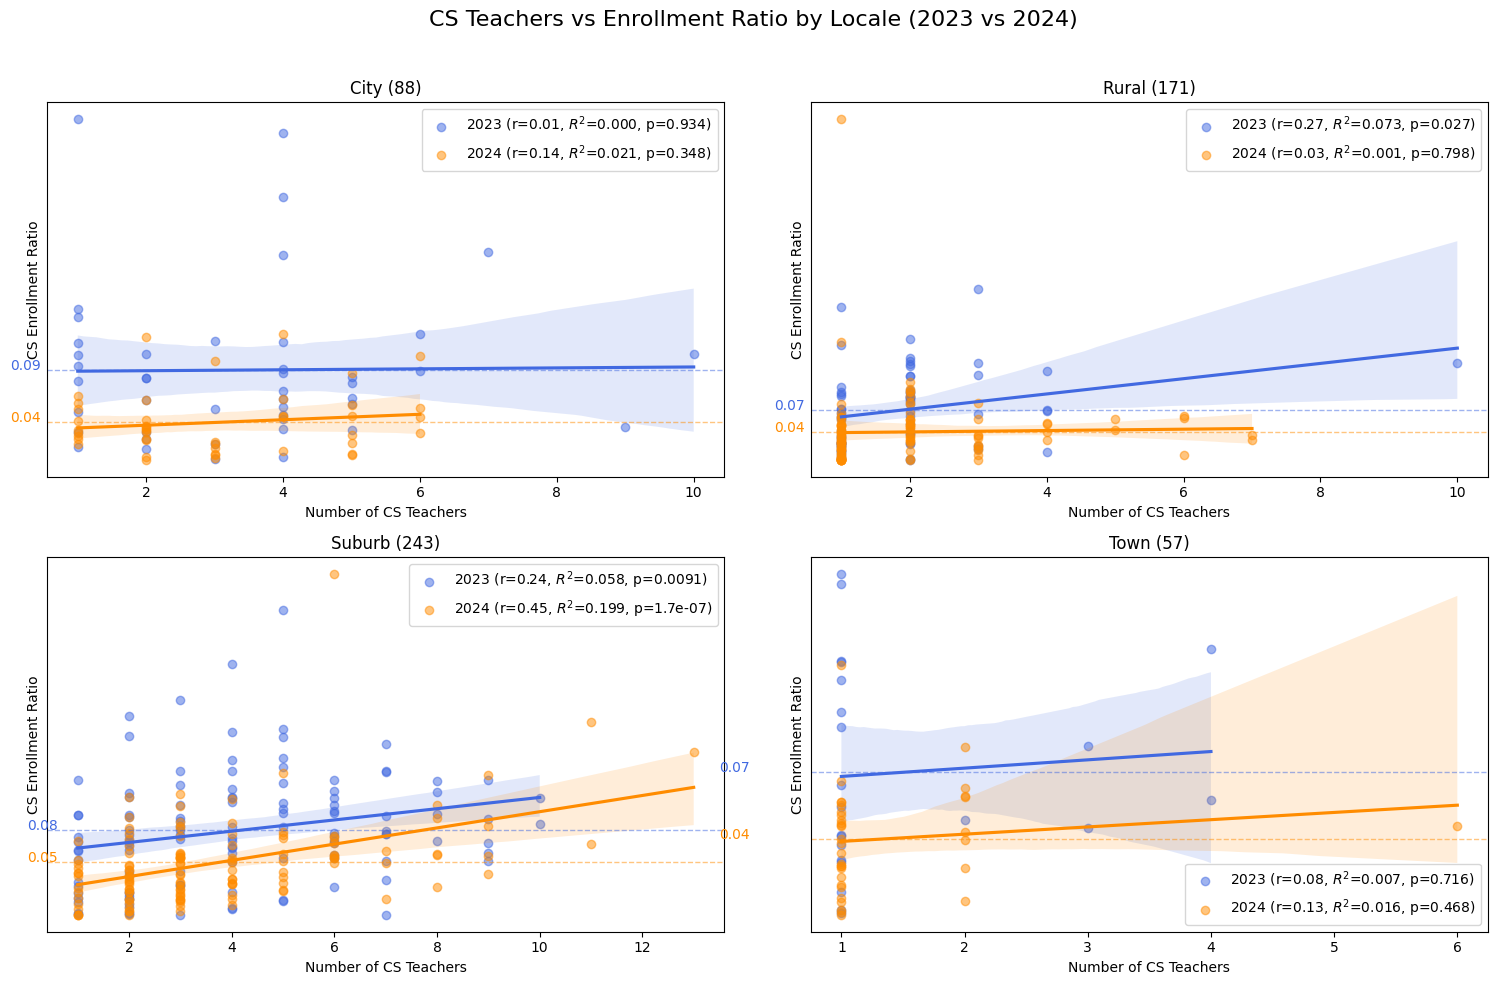

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import display, Markdown

valid_2023["Year"] = 2023
valid_2024["Year"] = 2024
combined = pd.concat([valid_2023, valid_2024], ignore_index=True)

combined = combined[
    (combined["Enrollment_Ratio"] >= 0) &
    (combined["Total Student Count"] > 0) &
    (combined["CS_Teachers"] > 0)
].copy()

locale_order = sorted(combined["Locale"].dropna().unique())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, locale in enumerate(locale_order):
    ax = axes[i]
    for year, color in zip([2023, 2024], ['royalblue', 'darkorange']):
        data = combined[(combined["Locale"] == locale) & (combined["Year"] == year)]
        if len(data) > 1:
            r, p = pearsonr(data["CS_Teachers"], data["Enrollment_Ratio"])
            r_squared = r ** 2
            sns.regplot(
                data=data,
                x="CS_Teachers",
                y="Enrollment_Ratio",
                ax=ax,
                scatter_kws={"alpha": 0.5},
                line_kws={"color": color},
                color=color,
                label=f"{year} (r={r:.2f}, $R^2$={r_squared:.3f}, p={p:.3g})"
            )
            mean_val = data["Enrollment_Ratio"].mean()
            ax.axhline(mean_val, color=color, linestyle='--', linewidth=1, alpha=0.5)
            ax.text(0.01, mean_val, f"{mean_val:.2f}", color=color, fontsize=10)

    ax.set_title(f"{locale} ({len(combined[combined['Locale'] == locale])})", fontsize=12)
    ax.set_xlabel("Number of CS Teachers")
    ax.set_ylabel("CS Enrollment Ratio")

    ax.set_yticks([])
    ax.set_yticklabels([])

    ax.legend()

fig.suptitle("CS Teachers vs Enrollment Ratio by Locale (2023 vs 2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
